In [1]:
import pandas as pd

df = pd.read_csv("listings.csv")


In [2]:
cols_to_drop = ['listing_url', 'scrape_id', 'source', 'picture_url', 'host_url', 'host_thumbnail_url',
                'host_picture_url', 'calendar_updated', 'license', 'neighbourhood_group_cleansed']
df.drop(columns=cols_to_drop, inplace=True)


In [3]:
df.dropna(thresh=len(df)*0.5, axis=1, inplace=True)


In [4]:
df['host_response_time'].fillna('unknown', inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_14588\759698656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_response_time'].fillna('unknown', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14588\759698656.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
df['host_response_time'] = df['host_response_time'].fillna('unknown')
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].mean())


In [6]:
df['price'] = df['price'].replace('[r\$,]', '', regex=True).astype(float)
df['last_scraped'] = pd.to_datetime(df['last_scraped'])
df['host_since'] = pd.to_datetime(df['host_since'])


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_14588\546577562.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[r\$,]', '', regex=True).astype(float)


In [7]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['last_scraped'] = pd.to_datetime(df['last_scraped'])
df['host_since'] = pd.to_datetime(df['host_since'])


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_14588\3703363937.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [8]:
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['last_scraped'] = pd.to_datetime(df['last_scraped'])
df['host_since'] = pd.to_datetime(df['host_since'])


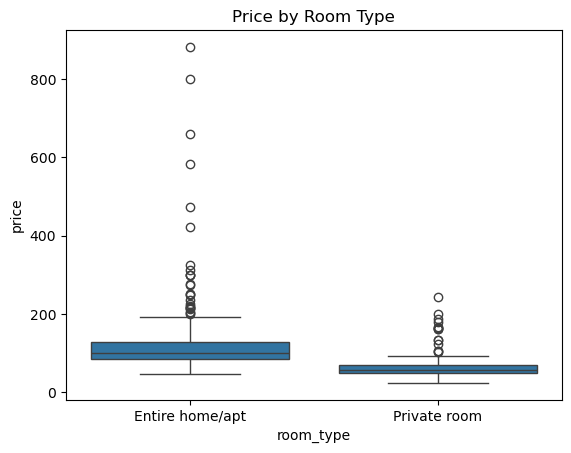

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price by Room Type")
plt.show()


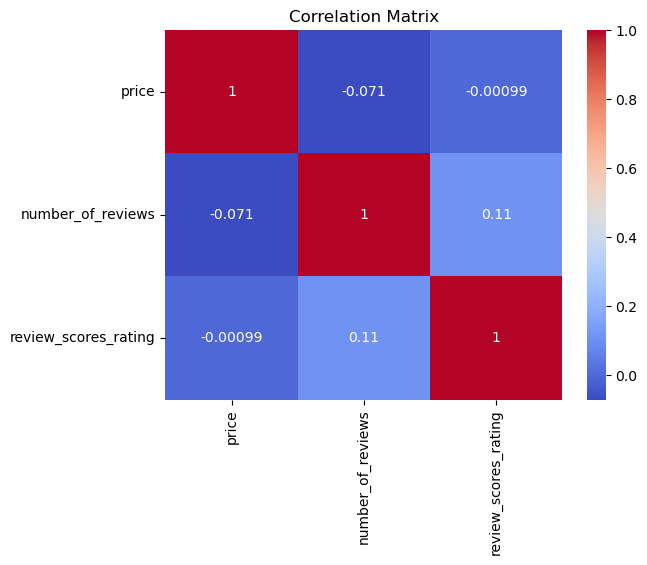

In [10]:
corr = df[['price', 'number_of_reviews', 'review_scores_rating']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [11]:
df['host_duration_days'] = (df['last_scraped'] - df['host_since']).dt.days
df['price_per_person'] = df['price'] / df['accommodates']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['accommodates', 'bedrooms', 'number_of_reviews']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


ValueError: Input y contains NaN.

In [13]:
# 1. Select the features and target
X = df[['accommodates', 'bedrooms', 'number_of_reviews']]
y = df['price']

# 2. Drop rows where target or any feature is NaN
df_model = pd.concat([X, y], axis=1).dropna()

# 3. Split cleaned data
X_clean = df_model[['accommodates', 'bedrooms', 'number_of_reviews']]
y_clean = df_model['price']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# 4. Fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


RMSE: 71.56462737013634


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

# 1. Select relevant features and target
X = df[['accommodates', 'bedrooms', 'number_of_reviews']]
y = df['price']

# 2. Combine X and y to remove any rows with NaN values
df_model = pd.concat([X, y], axis=1).dropna()

# 3. Split into clean X and y
X_clean = df_model[['accommodates', 'bedrooms', 'number_of_reviews']]
y_clean = df_model['price']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# 5. Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 71.48595529689293


In [15]:
df.to_csv("cleaned_listings.csv", index=False)


In [16]:
# Separate columns by data type
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

# Fill numeric columns with median
for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# Fill categorical columns with mode (most frequent value)
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]  # mode() returns a Series
        df[col] = df[col].fillna(mode_val)

print("✅ All missing values have been filled.")


✅ All missing values have been filled.


In [17]:
df.to_csv("clnd_listings.csv", index=False)